In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

%load_ext autoreload
%autoreload 2

## Machine Learning ##

- Subfield of Artificial Intelligence;
- "Learn without being explicitly programmed" (cite);
- Extract meaningful information from **data** and **generalize** to unseen examples.

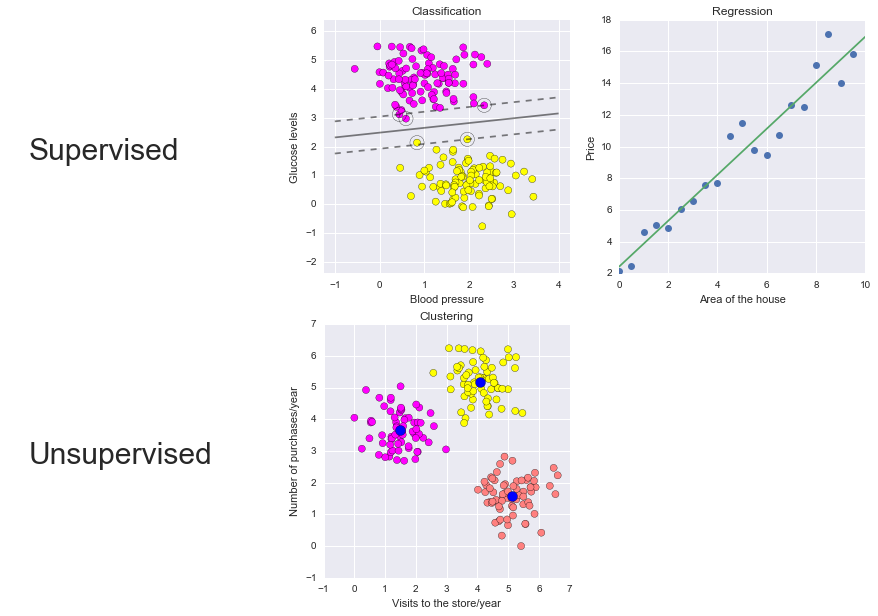

In [2]:
from ml_aux import show_ml_examples

show_ml_examples()

## Scikit-learn ##

Scikit-learn is a Python module for Machine Learning. It is built on top of Numpy, SciPy and Matplotlib and works for both Python 2.7 and Python 3.5.

The project was started in 2007 by David Cournapeau as a Google Summer of Code project and now it is open-source.

It has a very simple API. Let's see one example:

X is a (200L, 2L) matrix and y a (200L,) vector.


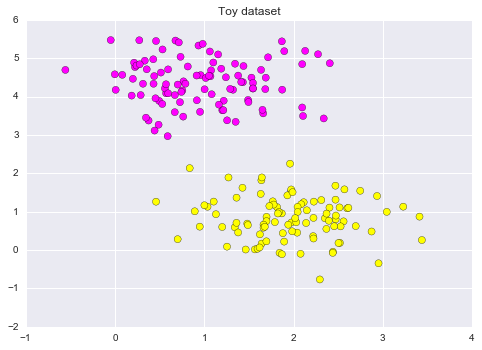

In [3]:
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.60)
print 'X is a {0} matrix and y a {1} vector.'.format(X.shape, y.shape)

plt.title('Toy dataset')
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring');

We will use this toy dataset and create a model that will separate the two classes (purple and yellow). For that, we will use an algorithm named LogisticRegression:

Accuracy = 0.995


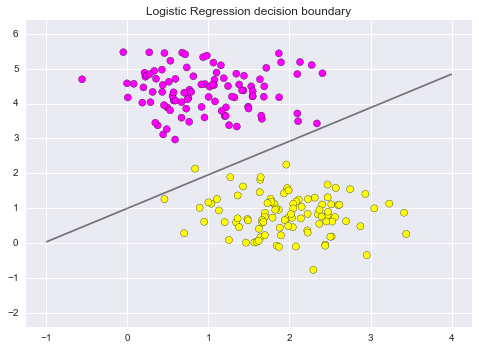

In [4]:
from ml_aux import plot_proba_function
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=1, fit_intercept=True, penalty='l2')
clf.fit(X, y)

print 'Accuracy = {0}'.format(clf.score(X, y))

plt.title('Logistic Regression decision boundary')
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_proba_function(clf)

In scikit-learn, these algorithms are called Estimators and they all implement the ```fit``` method:

```python
model = model.fit(data, labels)
```

Most of the scikit-learn estimators offer a similar interface. The differences lie mostly on whether the estimators are *supervised* or *unsupervised*.

 - model.predict(data): Returns an array containing the classes of every example in *data*.
 - model.predict_proba(data): Some estimators implement this method. For each example, returns the probability of belonging to each of the classes. The class with the highest probability is the one returned by the predict method.
 - model.score(data, labels): Returns a measure of how good the fit was. Scores lie between 0 and 1.

## Logistic Regression

It computes $P(y\ |\ X) = \sigma(X \cdot w + b)$. The algorithm learns the best set of $w$ and $b$ that explain the data.

See the example where $w = [2, -2]$ and $b = 2$:

<img src="img/LogisticRegression_example.png" />

When we feed the model with $X = [1, 4]$, the model computes $X[0] \times w[0] + X[1] \times w[1] + b$ and then squashes the result to be between 0 and 1 using the sigmoid function.

Still, there are a lot of parameters to tune!

**Exercise:** Play a little bit with the model to get an intuition of what it does.

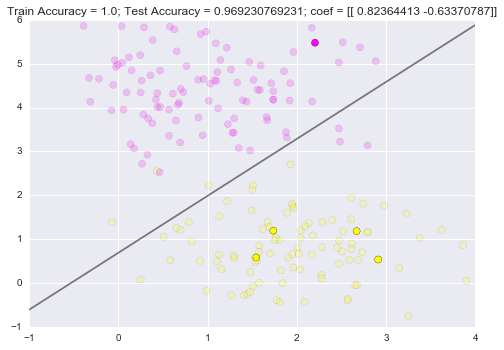

In [5]:
from IPython.html.widgets import interact
from ml_aux import plot_logistic_regression

interact(plot_logistic_regression, N=[5, 200], C=[1, 1e3], fit_intercept=[False, True], penalty=['l2', 'l1']);

# Digits recognition

One of the most famous data available is MNIST which has thousands of hand-written digits: 0, 1, 2, 3, 4, ..., 8, 9!

The digits are in gray-scale. Each digit is therefore a matrix.

Let's explore the data!

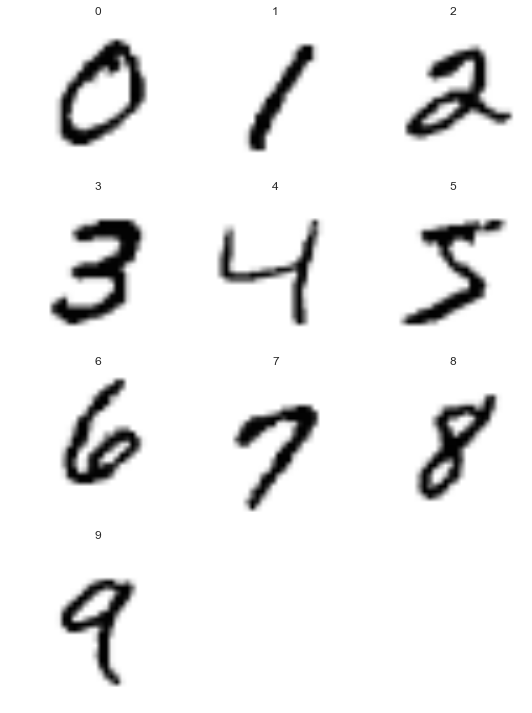

In [6]:
from ml_aux import show_dataset, load_MNIST

(X_train, y_train), (X_test, y_test) = load_MNIST()
show_dataset(X_train, y_train, (28, 28), range(10))

Let's train a logistic regression on this database:

C:\Users\user\Anaconda3\envs\py27\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


Accuracy on train set = 0.75755
Accuracy on test set = 0.7728


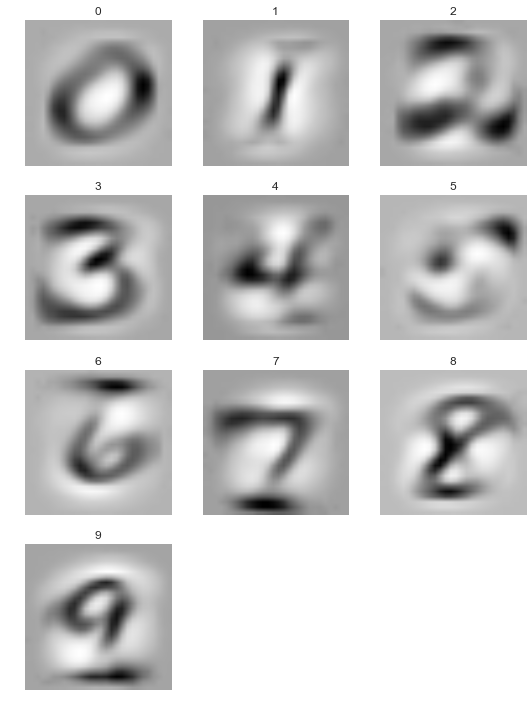

In [7]:
from ml_aux import train_logistic_regression, plot_weights

clf = train_logistic_regression(X_train, y_train)
print 'Accuracy on train set = {0}'.format(clf.score(X_train, y_train))
print 'Accuracy on test set = {0}'.format(clf.score(X_test, y_test))
plot_weights(clf, (28, 28), range(10))

We can see that the Logistic Regression classifier did not perform very well on this dataset. Nonetheless, the results are a lot higher than a random classifier that would achieve around $10\%$ accuracy.

**But what did the model learn?**

The above plots depict the learned weights for each digit. Given a new image, the Logistic Regression model returns the digit with the most similar weight matrix.

To get a better idea of how the model is doing, we can compute a confusion matrix. In this matrix, the columns define what the model predicts and the rows the true class of the example. For instance, if the model predicts a 0 but it is actually a 1, we add one to the cell at column 0 and row 1. All the right predictions are on the diagonal of the matrix.

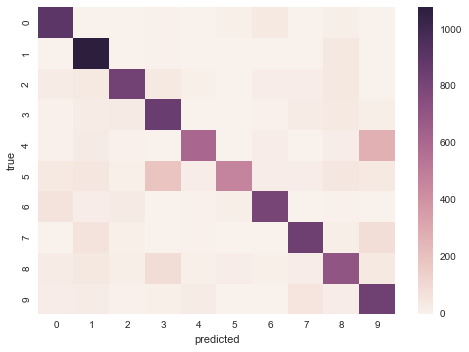

In [8]:
from sklearn.metrics import confusion_matrix
from ml_aux import plot_confusion_matrix

y_pred = clf.predict(X_test)
conf = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf)

We can see that there are a lot of 4's being predicted as 9's and some 5's being predicted as 3's. But overall, the errors are spread across all the classes.

**Question:** what happens if we have an image of a number a bit translated to one of the sides? Or rotated? Or on a different scale?

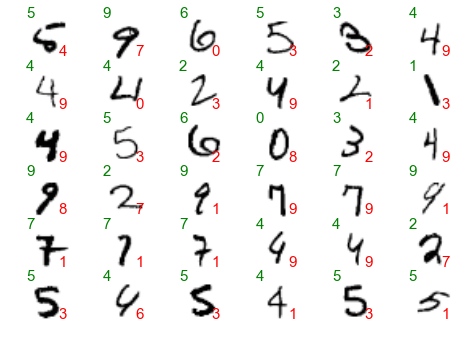

In [9]:
from ml_aux import plot_wrong_predictions

plot_wrong_predictions(clf, X_test, y_test, width=6, height=6)


## CIFAR-10 ###

The MNIST dataset is a fairly easy one. With real worlds images, we have to take into account color, occlusions, different light conditions,...

Let's see how the logistic regression does in the CIFAR-10 dataset.

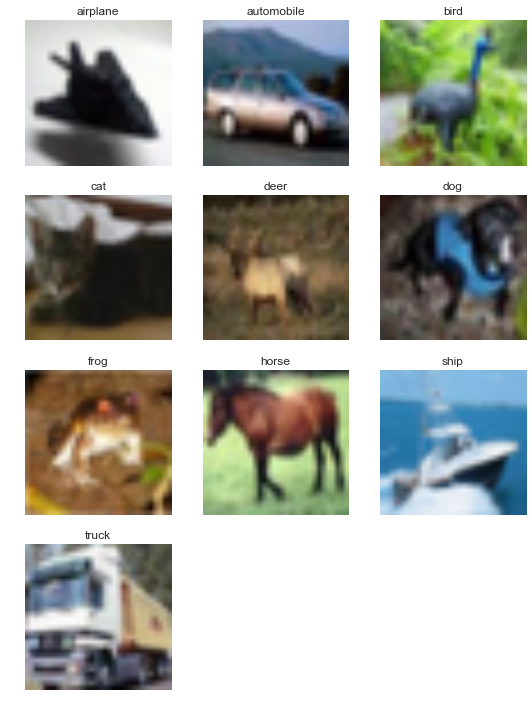

In [10]:
from ml_aux import load_CIFAR10

(X_train, y_train), (X_test, y_test) = load_CIFAR10()
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

show_dataset(X_train, y_train, (32, 32, 3), cifar10_classes)

Accuracy on train set = 0.33458
Accuracy on test set = 0.3356


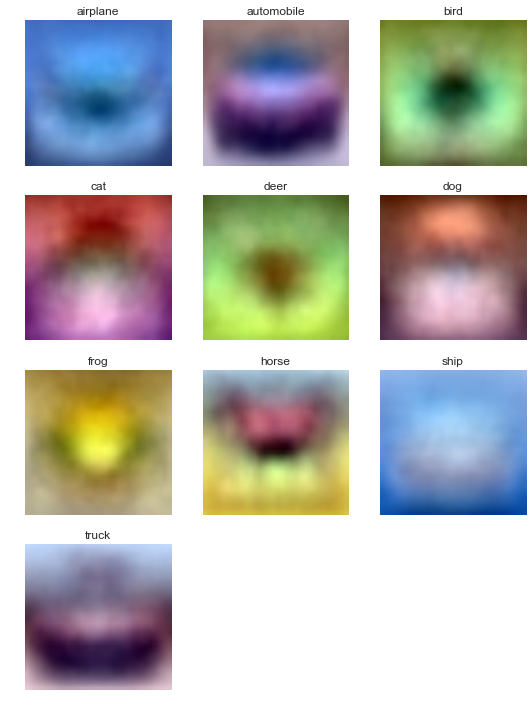

In [11]:
clf = train_logistic_regression(X_train, y_train)
print 'Accuracy on train set = {0}'.format(clf.score(X_train, y_train))
print 'Accuracy on test set = {0}'.format(clf.score(X_test, y_test))
plot_weights(clf, (32, 32, 3), cifar10_classes)

In this dataset the logistic regression classifier achieved much worse results. We can see by the weights that there is a lot more variability on this dataset than on the MNIST. 

**Question:** Look at what the model thinks it's a horse. It looks like it has two heads. Why is that?

Linear models have a hard time dealing with all this variability since they have a single "image" of what a class looks like. That is not how humans recognize objects:

**Question:** Describe a car!

## Neural Networks

We tend to decompose an object into its multiple parts. Imagine you could create a Logistic Regression classifier for all these different parts (i.e. car wheel, airplane wing, cats ears, eyes,...). Then, after detecting all these features, you could train a simple logistic regression on top of the results of the previous classifiers.

That is what a neural network is!

<img src="img/NeuralNetwork_example.svg" />

In theory, this simple network can approximate any function given that it has enough hidden units. In practice it requires a lot of data and a lot of care not to overfit.

Some history:
- 1943: first model by a psychologist
- 1975: backpropagation algorithm
- 1998: convolutional neural networks for recognition of zip codes
- 2012: a deeper convolutional neural network won the ImageNet competition by a large margin

**Exercise:** train a neural network on the MNIST dataset. Compare the results with the simple logistic regression.  
*Help:* use the sklearn.neural_network.MLPClassifier with the parameters:
 - hidden_layer_sizes: a list with the size of each hidden layer (i.e. [100] to create a single hidden layer with 100 units);
 - alpha: a float (usually between 0 and 1) called regularization term used to penalize complex models. Use it if your test accuracy is low compared with your train accuracy.

In [ ]:
from sklearn.neural_network import MLPClassifier

###############################################
#                YOUR CODE                    #
###############################################

###############################################
###############################################

The neural network is a lot slower to train but the results were better!

Let's look at what features the neural network extracted.

In [ ]:
idx = 31
plt.imshow(clf.coefs_[0][:, idx].reshape((28, 28)))
plt.axis('off');

Most of the time it is not clear to us what the network learnt. It is not easy to explain the results of the network, although that is an hot research topic with some promising results.